<a href="https://colab.research.google.com/github/ChauhanVanshita/House-Price-Prediction/blob/main/Housing_price_prediction_using_Regularised_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing price prediction using linear regression**
(*Regularised Gradient Descent and Regularised Normal equation*)

---





In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1.   *Delete unnecessary column*
2.   *Normalised the data with mean*


In [65]:
data = pd.read_csv('BostonHousing.csv')
data=data.drop(['ptratio', 'lstat'],axis=1)
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,b,medv
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,0.440616,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,0.440616,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,0.396035,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.415751,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.440616,1.486032



3.   *Separate out the Feature and Target matrices
and devide test and train data with 0.9 split ratio*







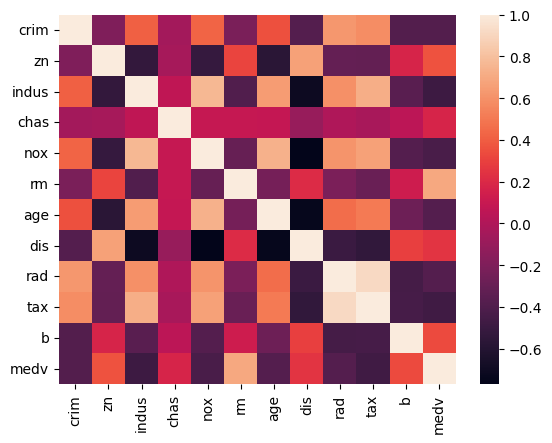

In [67]:
# Find correlation between all available columns
corr = data.corr()
# Find correlated data columns using heatmaps
sns.heatmap(corr)
plt.show()

# Columns which are having correlation +ve and above 0.9 are highly correlated to each other


In [68]:

data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
split_ratio = 0.9
split = int(split_ratio * X.shape[0])
X_test = X[split+1:,:]
X_train = X[:split+1, :]
Y_test = Y[split+1:,:]
Y_train = Y[:split+1, :]

4. *Compute cost function*
5. *denormalise price funcion*
6. *compute error function*
7. *plot graph function*

In [69]:
# helper Functions
def computeCost(X,y,theta,lam):
    tobesummed = np.power(((X.dot(theta.T))-y),2)+lam*np.sum(np.power(theta,2))
    return np.sum(tobesummed)/(2 * len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error /= len(actual)
    return error[0]

def plotGraph(x,y,labelX='X',labelY='Y',title='X vs Y'):
  fig, ax = plt.subplots()
  ax.plot(x, y, 'r')
  ax.set_xlabel(labelX)
  ax.set_ylabel(labelY)
  ax.set_title(title)

7. *Gradient descent with regularisation to fint minimum theta*

In [70]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha, lam):
    lam_matrix = lam * np.ones(theta.shape)
    lam_matrix[0][0] = 0
    for i in range(iters):
        theta = theta*(1- lam_matrix / len(X)) - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)

    return theta

7. *Normal eqution function with regularisation to find minimum theta*

In [71]:
#Normal equation
def normalEquation(X,Y,lam):
    lam_matrix = lam * np.identity(X.shape[1])
    lam_matrix[0][0] = 0
    theta = np.linalg.inv(X.T.dot(X) + lam_matrix).dot(X.T).dot(Y)
    return theta


8. *Train the model with train data and predict the test data using gradient descent*
9. *compute the minimum error and lambda*
10. *plot error vs lambda graph*

min Error  :  540.9108433426503 %
Optimal Lambda :  0


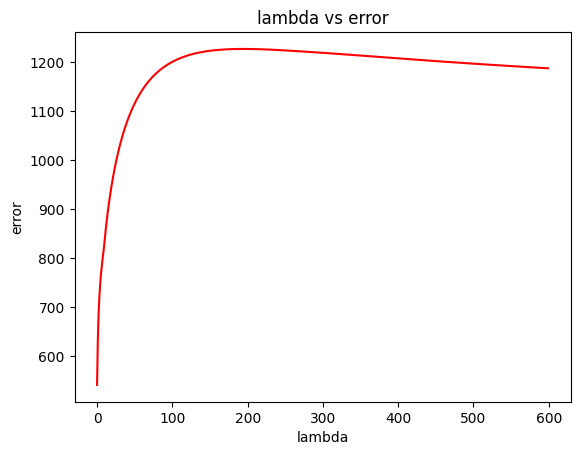

In [72]:
theta = np.zeros([1,X.shape[1]])
alpha = .1 #learning rate
iters = 500 #epoch
error_matrix = []
lam_range = 600 #maximam lamda
for lam in range(lam_range):
    g = gradientDescent(X_train,Y_train,theta,iters,alpha, lam)
    Cost = computeCost(X_train,Y_train,g,lam)

    Y_pred = X_test.dot(g.T)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_matrix.append(error*100)
optimal_lambda = 0
min_error = 9999
for i in range(len(error_matrix)):
    if error_matrix[i] < min_error:
        optimal_lambda = i
        min_error = error_matrix[i]

print("min Error  : ", (min_error),'%')
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_matrix,'lambda','error','lambda vs error')

In [73]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2][0]))

pred price = 5.75059834590936 actual price = 7.75223


11. *Train the model with train data and predict the test data using Normal Equation*
12. *compute the minimum error and lambda*
13. *plot error vs lambda graph*

min Error :  404.6203606506847
Optimal Lambda :  0


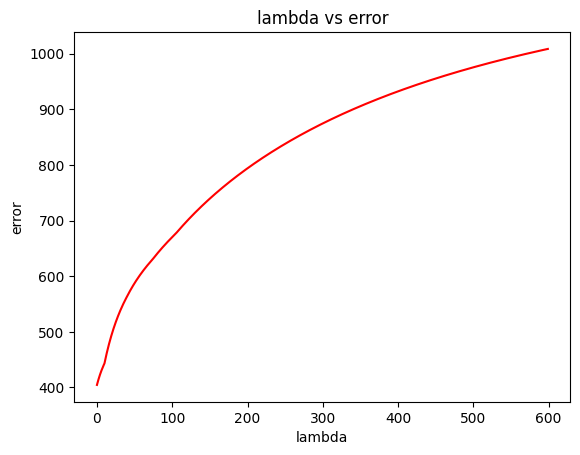

In [74]:
error_mat = []
lam_range = 600

for lam in range(lam_range):
    theta = normalEquation(X,Y,lam)
    Cost = computeCost(X_train,Y_train,theta.T,lam)
    Y_pred = X_test.dot(theta)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_mat.append(error*100)

optimal_lambda = 0
min_error = 9999
for i in range(len(error_mat)):
    if error_mat[i] < min_error:
        optimal_lambda = i
        min_error = error_mat[i]
print("min Error : ", min_error)
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_mat,'lambda','error','lambda vs error')

In [75]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2])[0])

pred price = 9.877085294105022 actual price = 7.75223
